In [1]:
from langchain_core.runnables import RunnableConfig
from typing_extensions import Annotated, TypedDict
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph


In [5]:
def reducer(a:list, b: int | None) -> list:
    if b is not None:
        return a + [b]
    return a

class State(TypedDict):
    x: Annotated[list, reducer]

class ConfigSchema(TypedDict):
    r:float

graph = StateGraph(State, config_schema=ConfigSchema)

def node(state: State, config: RunnableConfig) -> dict:
    r = config["configurable"].get("r", 1.0)
    x = state["x"][-1]
    next_value = x * r * (1 - x)
    return {"x": next_value}

graph.add_node("A", node)
graph.set_entry_point("A")
graph.set_finish_point("A")
compiled = graph.compile()

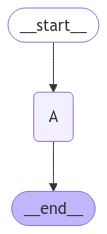

In [12]:
from IPython.display import Image, display

try:
    display(Image(compiled.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [13]:
print(compiled.config_specs)

[ConfigurableFieldSpec(id='r', annotation=<class 'float'>, name=None, description=None, default=None, is_shared=False, dependencies=None)]


In [6]:
step1 = compiled.invoke({"x":0.5}, {"configurable": {"r": 3.0}})
print(step1)

{'x': [0.5, 0.75]}
